In [6]:
import pyfair

import matplotlib
%matplotlib inline

import pandas as pd

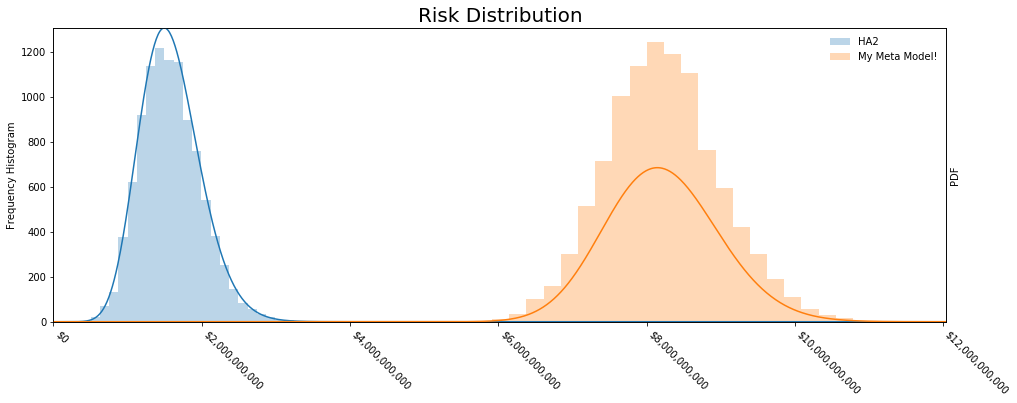

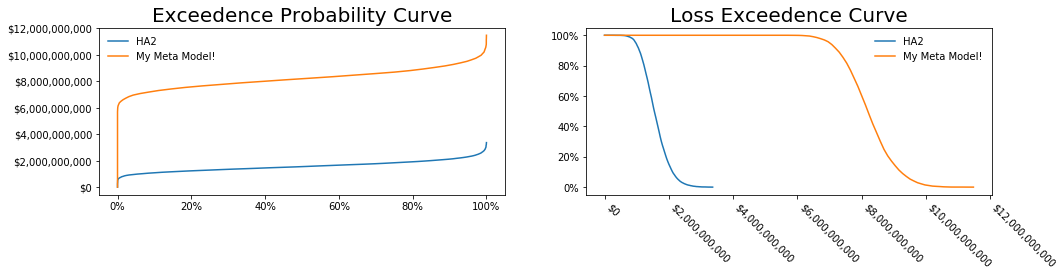

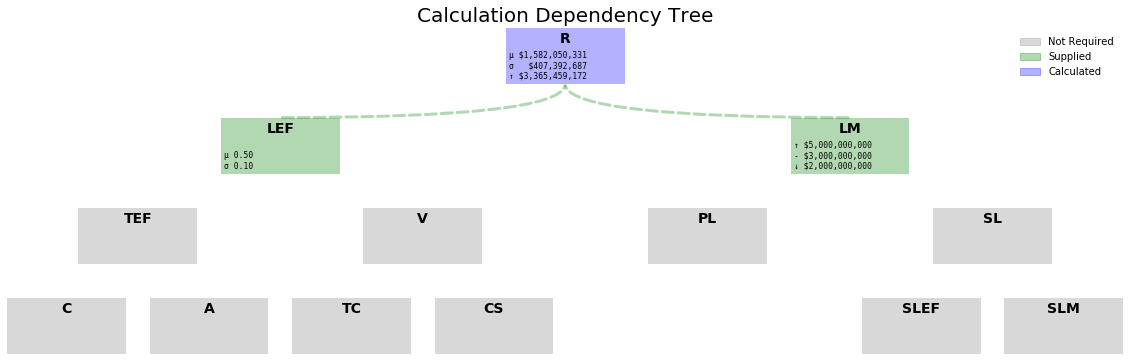

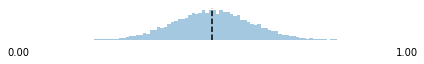

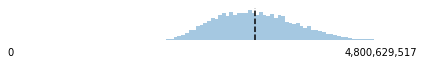

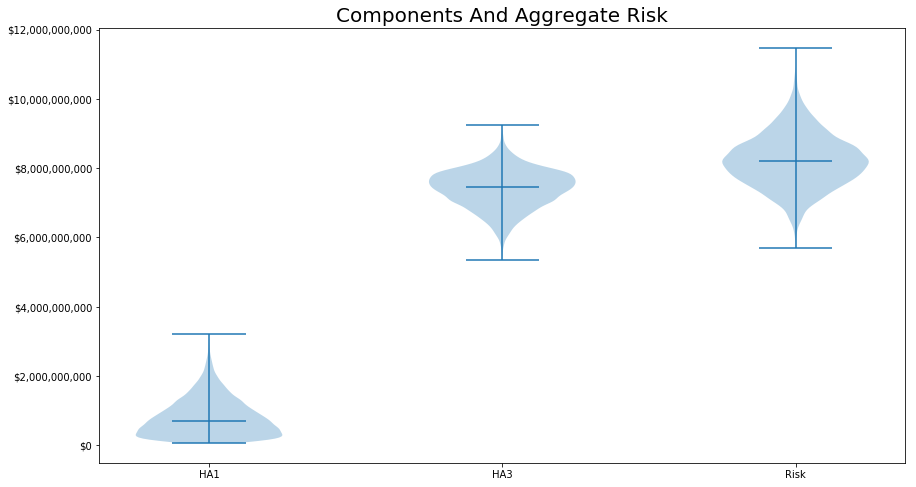

In [2]:
model1 = pyfair.FairModel(name="HA1", n_simulations=10_000)
model1.input_data('Loss Event Frequency', low=20, mode=100, high=900)
model1.input_data('Loss Magnitude', low=3_000_000, mode=3_500_000, high=5_000_000)
model1.calculate_all()

model2 = pyfair.FairModel(name="HA2", n_simulations=10_000)
model2.bulk_import_data({
    'Loss Event Frequency':    {'mean':.5, 'stdev':.1},
    'Loss Magnitude': {'low': 2_000_000_000, 'mode': 3_000_000_000, 'high': 5_000_000_000}
})
model2.calculate_all()

model3 = pyfair.FairModel(name="HA3", n_simulations=10_000)
model3.input_data('Loss Event Frequency', low=10, mode=15, high=16)
model3.input_data('Loss Magnitude', low=500_000_000, mode=500_900_000, high=600_000_000)
model3.calculate_all()

results = model1.export_results()
node_statuses = model1.get_node_statuses()

mm = pyfair.FairMetaModel(name='My Meta Model!', models=[model1, model3])
mm.calculate_all()

fsr = pyfair.FairSimpleReport([model2, mm])
fsr.to_html('output.html')

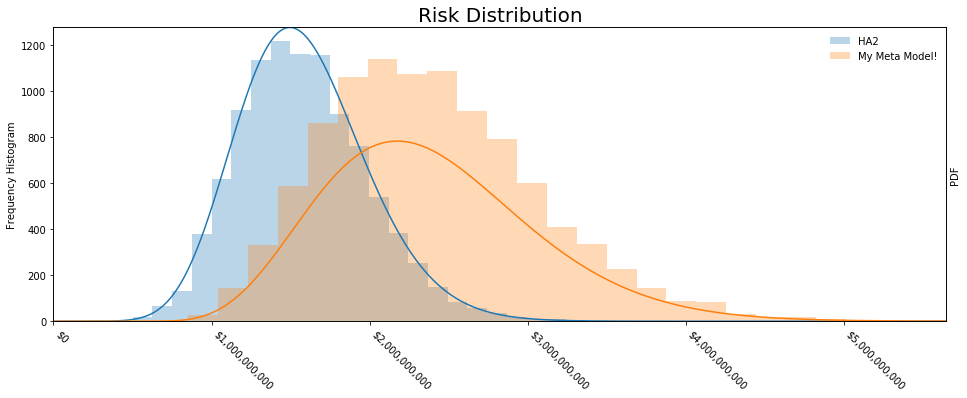

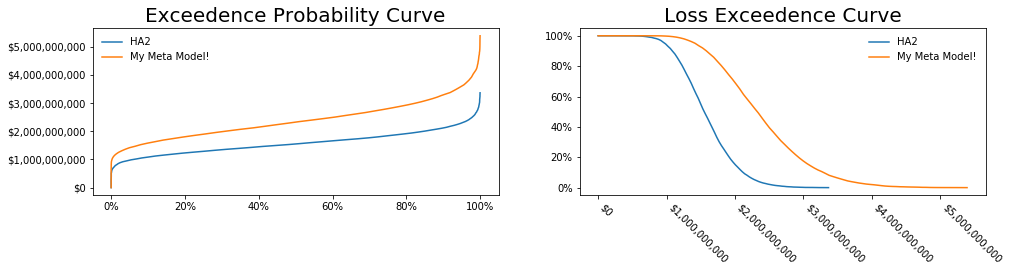

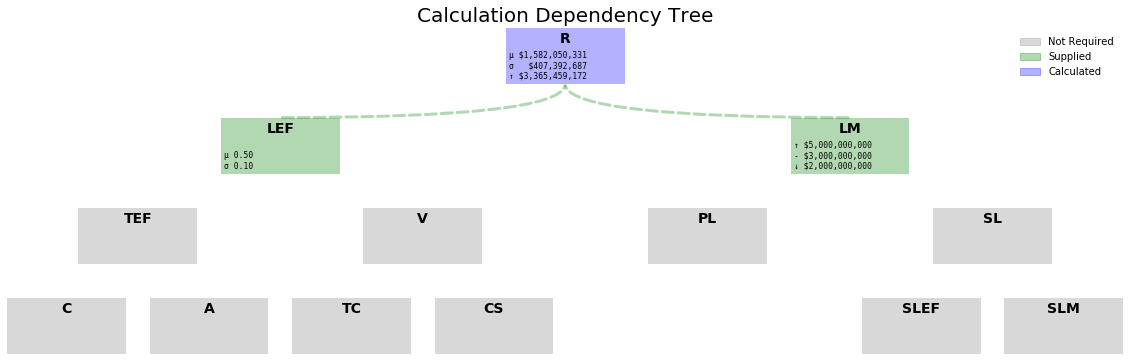

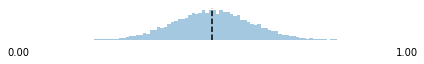

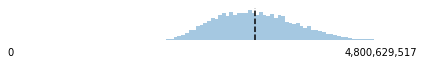

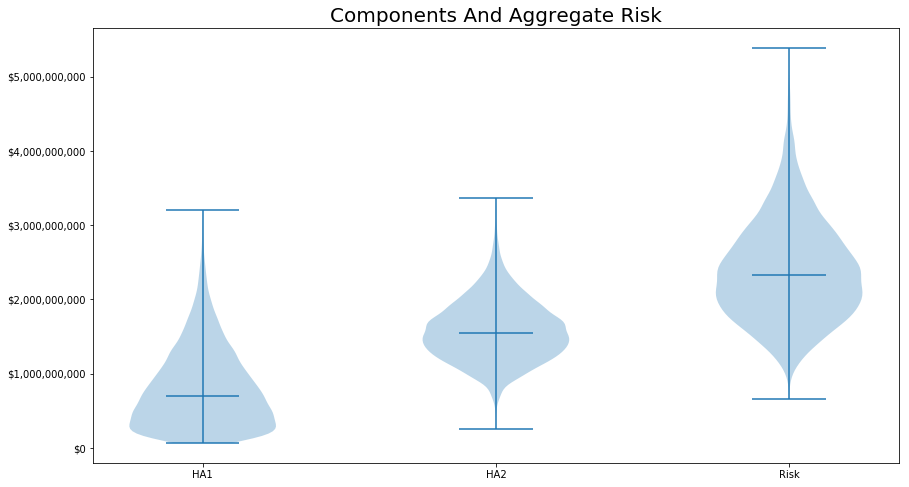

In [3]:
mm = pyfair.FairMetaModel(name='My Meta Model!', models=[model1, model2])
mm.calculate_all()

fsr = pyfair.FairSimpleReport([model2, mm])
fsr.to_html('output.html')

# Components

<section header and metadata>

<section overview>

* Summary General
    * Summary Table (mean, stdev, low, high, n)
    * hist
    * Exceedence curves
* Summary Comparison
    * Summary Table (mean, stdev, low, high, n)
    * Summary Table 2
    * Combined Hist
    * Exceedence curves
    
<section parameters>

* Model Detail
    * Parameter table with distributions
* Metamodel Detail
    * Risk table with stacked area
    
<section> and source code
* JSON

# Reports
* Compare
* Single
* Metamodel Drilldown

In [4]:

pd.DataFrame({
    model1.get_name(): model1.export_results()['Risk'],
    model2.get_name(): model2.export_results()['Risk'],    
}).agg([np.mean, np.std, np.min, np.max])



NameError: name 'pd' is not defined

In [ ]:
from pyfair.report.distribution import FairDistributionCurve

fdc = FairDistributionCurve([model1, model2, model3])
#fig, ax = fdc.generate_image()

fig, ax = fdc.generate_image()
fdc.generate_icon('HA1', 'Risk')

In [ ]:
from pyfair.report.exceedence import FairExceedenceCurves

fpc = FairExceedenceCurves([model1, model2, model3])
fig1, ax1 = fpc.generate_image()

In [ ]:
import numpy as np

In [ ]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

fdi = FairDataInput()
data = fdi.generate('Control Strength', count=10_000, low=.2, high=1.5, mode=.4)

plt.hist(data)